qualified_individuals has been cleared and recreated!
 Year Span  Number of People
        15                12
        20                18
        25                 9
        30                 6
        35                12
        40                 8
        45                10
        50                 3
        55                 4
 Oldest Age  Number of People
         15                 9
         20                18
         25                11
         30                 6
         35                 8
         40                 7
         45                10
         50                 5
         55                 3
         60                 1
         65                 3
         70                 1

Qualified individuals for this run: 4
IDs of these people: 003, 004, 005, 006


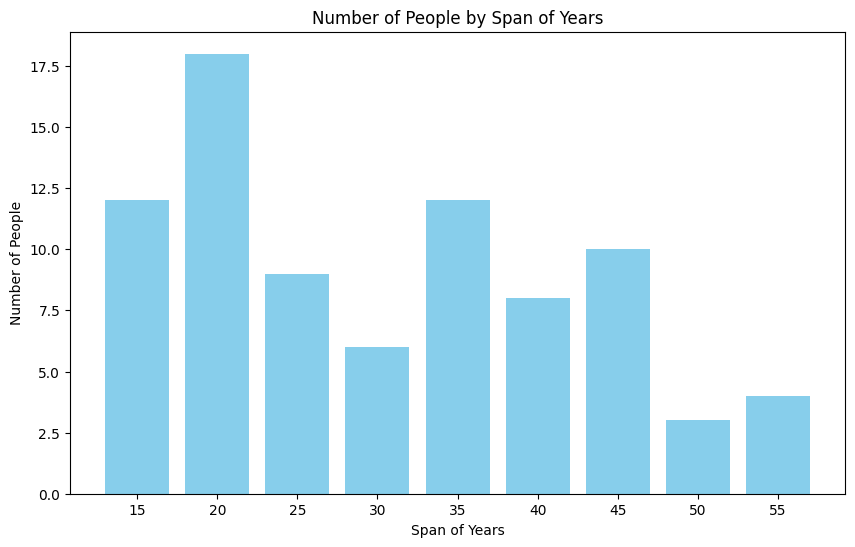

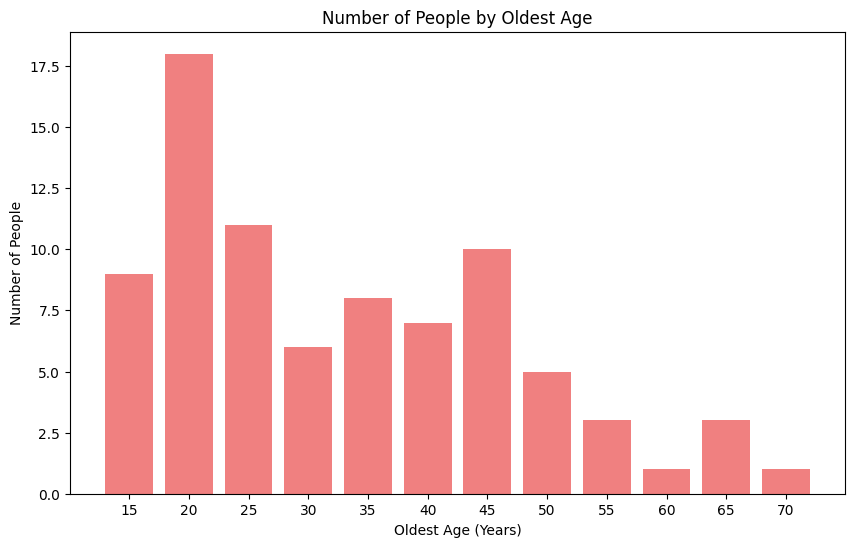

In [1]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import shutil


### Note that with every run of the following codes, the output folder that contains the qualified images will be cleared and filled again with new outcomes.
### There will be a .txt file in the output folder called "qualified_individuals" providing the criteria of the latest run and a list of the qualified individuals. 

def analyze_dataset(directory_path):
    person_age_span = {}
    person_files = {}

    pattern = r"(\d{3})A(\d{2})[a-zA-Z]?\.JPG"

    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} does not exist!")
        return

    for filename in os.listdir(directory_path):
        match = re.match(pattern, filename)
        if match:
            person_id = match.group(1)
            age = int(match.group(2))

            if person_id not in person_age_span:
                person_age_span[person_id] = [age, age]
                person_files[person_id] = [filename]
            else:
                person_age_span[person_id][0] = min(person_age_span[person_id][0], age)
                person_age_span[person_id][1] = max(person_age_span[person_id][1], age)
                person_files[person_id].append(filename)
        else:
            print(f"File {filename} does not match the expected pattern")

    year_span_count = {}
    oldest_age_count = {}
    people_with_disired_year_span = []
    output_folder = 'qualified_individuals'

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    elif os.path.exists(output_folder):
        shutil.rmtree(output_folder)
        os.makedirs(output_folder)
        print(f"{output_folder} has been cleared and recreated!")


    with open(os.path.join(output_folder, 'summary.txt'), 'w') as summary_file:

        desired_span = 30                   ### You can change the year span you want here.
        desired_oldest_age = 60             ### You can change the oldest age you want here.

        summary_file.write(f"This run selects individuals with a photo span of {desired_span} years or more and an oldest age of {desired_oldest_age} years old or more.\n\n")
        summary_file.write("The qualified individuals of this run are as follows:\n\n")

        for person_id, age_range in person_age_span.items():
            span = age_range[1] - age_range[0]
            latest_age = age_range[1]

            if span >= desired_span and latest_age >= desired_oldest_age:
                people_with_disired_year_span.append(person_id)

                for file in person_files[person_id]:
                    src = os.path.join(directory_path, file)
                    dst = os.path.join(output_folder, file)
                    shutil.copy(src, dst)

                summary_file.write(f"Person ID: {person_id}, Year Span: {span}, Latest Age: {latest_age}\n")

            # Binning for year span
            span_bin = (span // 5) * 5 + 5
            if span_bin not in year_span_count:
                year_span_count[span_bin] = 0
            year_span_count[span_bin] += 1

            # Binning for oldest age
            oldest_age_bin = (latest_age // 5) * 5 + 5
            if oldest_age_bin not in oldest_age_count:
                oldest_age_count[oldest_age_bin] = 0
            oldest_age_count[oldest_age_bin] += 1

        year_span_df = pd.DataFrame(list(year_span_count.items()), columns=['Year Span', 'Number of People'])
        year_span_df.sort_values(by='Year Span', inplace=True)

        oldest_age_df = pd.DataFrame(list(oldest_age_count.items()), columns=['Oldest Age', 'Number of People'])
        oldest_age_df.sort_values(by='Oldest Age', inplace=True)

        print(year_span_df.to_string(index=False))
        print(oldest_age_df.to_string(index=False))

        print(f"\nQualified individuals for this run: {len(people_with_disired_year_span)}")
        if people_with_disired_year_span:
            print("IDs of these people:", ", ".join(people_with_disired_year_span))

        # Plot for Year Span
        plt.figure(figsize=(10, 6))
        plt.bar(year_span_df['Year Span'].astype(str), year_span_df['Number of People'], color='skyblue')
        plt.xlabel('Span of Years')
        plt.ylabel('Number of People')
        plt.title('Number of People by Span of Years')
        plt.show()

        # Plot for Oldest Age
        plt.figure(figsize=(10, 6))
        plt.bar(oldest_age_df['Oldest Age'].astype(str), oldest_age_df['Number of People'], color='lightcoral')
        plt.xlabel('Oldest Age (Years)')
        plt.ylabel('Number of People')
        plt.title('Number of People by Oldest Age')
        plt.show()

directory_path = 'images'
analyze_dataset(directory_path)
